# Optimization algorithms

I want to know which ambulance to send. 

- Travel time: lower = benefit single case
- Coverage disruption = drop in % for primary and secondary

All the bases:


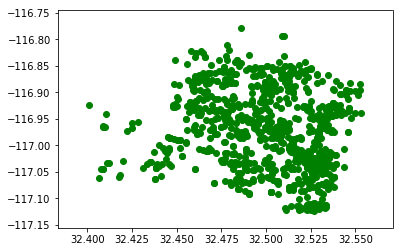

Every single call:


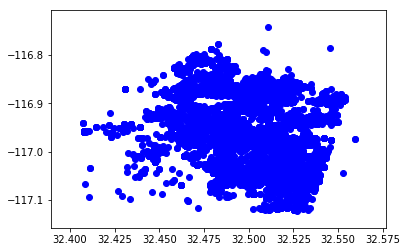

Clustered calls represented by 10 points:


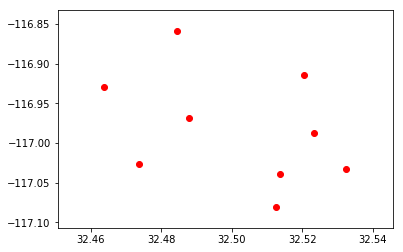

Overlay the demand points by the clustered demand points:


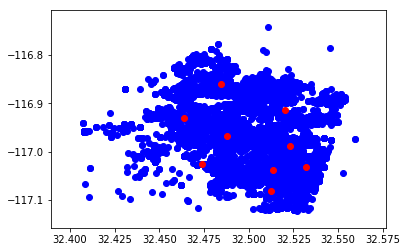

Overlay the bases by the clustered demand points:


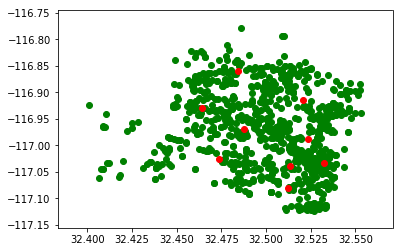

 I did not remove the redundant Mexico City data yet. 


In [1]:
import execute
execute.initial(run=True)

Next Step will probably be to write a function that returns the best estimate time traveled between base --> nearest demand point. 

## Step 1: set coverage algorithm

a) through k-means, find a set of 8 ambulances that has all of Tijuana covered by primary

For each representative call point, find the bases. 



-----------------------------------------------------
[  32.46391906 -116.92948148]  with distance of 0.23 km  
-----------------------------------------------------
([32.46574, -116.928852, 956], 0.21042607421091122)


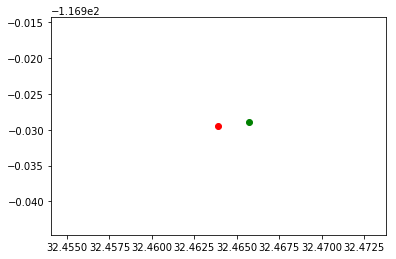



-----------------------------------------------------
[  32.51245769 -117.0807265 ]  with distance of 0.19 km  
-----------------------------------------------------
([32.512999, -117.078978, 740], 0.1749178028481554)


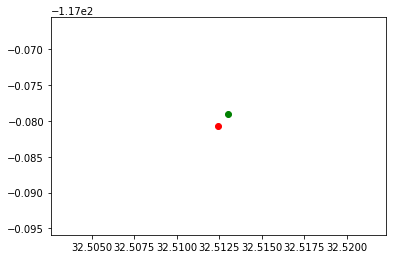



-----------------------------------------------------
[  32.52056953 -116.91422278]  with distance of 0.40 km  
-----------------------------------------------------
([32.517343, -116.927651, 438], 0.3814825820620052)


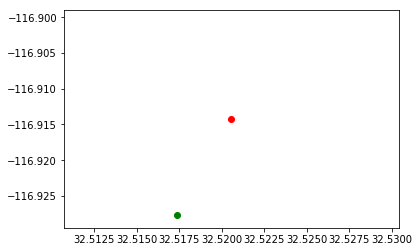



-----------------------------------------------------
[  32.48451975 -116.85909556]  with distance of 0.14 km  
-----------------------------------------------------
([32.483437, -117.033986, 453], 0.1262221424678572)


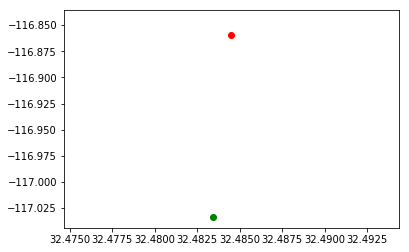



-----------------------------------------------------
[  32.48781322 -116.96843469]  with distance of 0.36 km  
-----------------------------------------------------
([32.488509, -116.972056, 849], 0.3489992886753619)


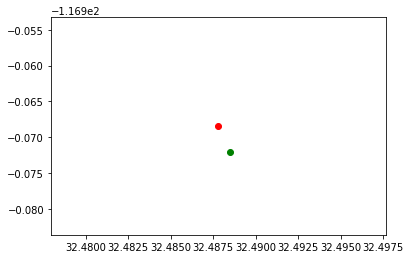



-----------------------------------------------------
[  32.52341741 -116.98807848]  with distance of 0.46 km  
-----------------------------------------------------
([32.522336, -116.892195, 442], 0.4492291121119601)


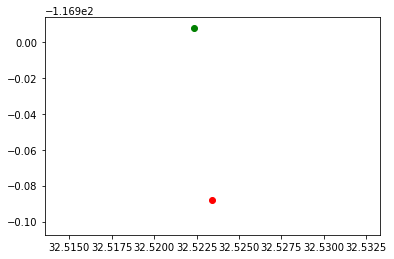



-----------------------------------------------------
[  32.47381924 -117.0262277 ]  with distance of 0.19 km  
-----------------------------------------------------
([32.474729, -117.027797, 512], 0.17871930576911235)


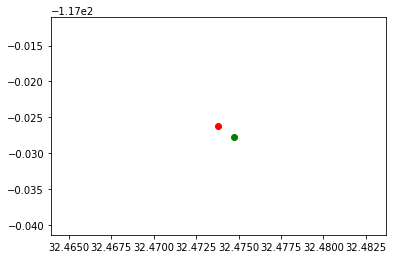



-----------------------------------------------------
[  32.51368792 -117.0391897 ]  with distance of 0.24 km  
-----------------------------------------------------
([32.514746, -117.041218, 456], 0.22380803036511238)


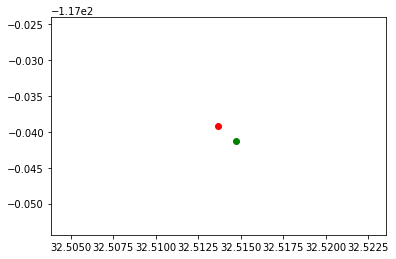



-----------------------------------------------------
[  32.53237012 -117.03285783]  with distance of 0.14 km  
-----------------------------------------------------
([32.531396, -116.967228, 254], 0.12873350365884814)


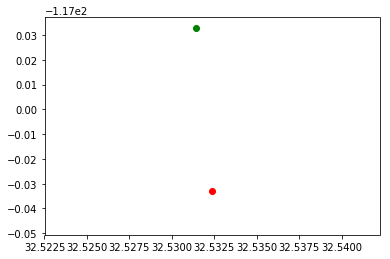

<< EOF >>


In [2]:
starter_set = execute.find_starting_set(run=True, display = True)

b) find the set of 8 that covers all primary and maximized the secondary coverage. 
- After having the set of all base combinations that satisfied r1 = 10, find the set with the highest percentage covered by r2=14



In [3]:
starter_set

[([32.463919060402745, -116.92948147651013],
  [([32.46574, -116.928852, 956], 0.21042607421091122)]),
 ([32.512457692307692, -117.08072649572618],
  [([32.512999, -117.078978, 740], 0.1749178028481554)]),
 ([32.520569530469658, -116.91422277722255],
  [([32.517343, -116.927651, 438], 0.3814825820620052)]),
 ([32.484519754976866, -116.8590955589587],
  [([32.483437, -117.033986, 453], 0.1262221424678572)]),
 ([32.487813224489869, -116.96843469387774],
  [([32.488509, -116.972056, 849], 0.3489992886753619)]),
 ([32.523417412935302, -116.98807848258723],
  [([32.522336, -116.892195, 442], 0.4492291121119601)]),
 ([32.473819238900646, -117.02622769556018],
  [([32.474729, -117.027797, 512], 0.17871930576911235)]),
 ([32.513687915935513, -117.03918969644377],
  [([32.514746, -117.041218, 456], 0.22380803036511238)]),
 ([32.5323701204819, -117.03285783132549],
  [([32.531396, -116.967228, 254], 0.12873350365884814)])]

In [4]:
execute.check_coverage(starter_set)

66

In [5]:
# this is just for fun. find ten different sets and check the coverage.
for x in range (25):
    new_set = execute.find_starting_set(run=True)
    num_coverage = execute.check_coverage(new_set)
    print(x, "\t", num_coverage)

0 	 66
1 	 66
2 	 66
3 	 66
4 	 66
5 	 66
6 	 66
7 	 66
8 	 66
9 	 66
10 	 66
11 	 66
12 	 66
13 	 66
14 	 66
15 	 66
16 	 66
17 	 66
18 	 66
19 	 66
20 	 66
21 	 66
22 	 66
23 	 66
24 	 66


In [6]:
# one more thing, do the same thing but send in only 7 bases.
for x in range (25):
    new_set = execute.find_starting_set(run=True)
    num_coverage = execute.check_coverage(new_set[0:7])
    print(x, "\t", num_coverage)

0 	 57
1 	 57
2 	 57
3 	 57
4 	 57
5 	 57
6 	 57
7 	 57
8 	 57
9 	 57
10 	 57
11 	 57
12 	 57
13 	 57
14 	 57
15 	 57
16 	 57
17 	 57
18 	 57
19 	 57
20 	 57
21 	 57
22 	 57
23 	 57
24 	 57


## Step 2: where the fun is

a) Find the travel times of each of the 8 ambulances, through lookup or query

b) Find the set disruption each ambulance would cause, as a result of r1 and r2. Include severity as a parameter. 
Coverage = Primary Coverage + Secondary Coverage 

## Step 3: 

a) Implement the dynamic, iterative case. 

## Various TODOs

- Add background image: https://stackoverflow.com/questions/15160123/adding-a-background-image-to-a-plot-with-known-corner-coordinates

- Remove redundant Mexico City information